In [773]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

Number of image sp train: 8972
Number of image sp valid: 1010
Number of image rp train: 700
Number of image rp valid: 10


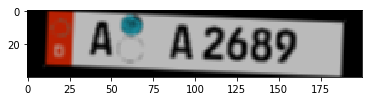

In [1081]:
rp_train_dir = os.path.join('Real_Plates', 'train')
sp_train_dir = os.path.join('Synthetic_Plates', 'train')
rp_valid_dir = os.path.join('Real_Plates', 'validation')
sp_valid_dir = os.path.join('Synthetic_Plates', 'validation')
images = []
labels = []
images_rp_train = []
labels_rp_train = []
images_rp_valid = []
labels_rp_valid = []
images_sp_valid = []
labels_sp_valid = []

for img in os.listdir(sp_train_dir):
    images.append(cv2.imread(os.path.join(sp_train_dir, img)))
    labels.append(img.split('.')[0])
    
for img in os.listdir(rp_train_dir):
    images_rp_train.append(cv2.imread(os.path.join(rp_train_dir, img)))
    labels_rp_train.append(img.split('.')[0])
    
for img in os.listdir(rp_valid_dir):
    images_rp_valid.append(cv2.imread(os.path.join(rp_valid_dir, img)))
    labels_rp_valid.append(img.split('.')[0])
    
for img in os.listdir(sp_valid_dir):
    images_sp_valid.append(cv2.imread(os.path.join(sp_valid_dir, img)))
    labels_sp_valid.append(img.split('.')[0])

print('Number of image sp train:', len(images))
print('Number of image sp valid:', len(images_sp_valid))
print('Number of image rp train:', len(images_rp_train))
print('Number of image rp valid:', len(labels_rp_valid))

plt.imshow(images[0])

In [1048]:
np.array(images_rp_train).shape

(700,)

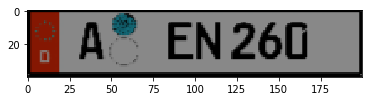

In [1000]:
plt.imshow(images_sp_valid[0])

Shape: (40, 200, 3)


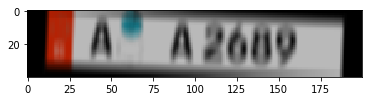

In [1023]:
# Make blurred
blurred_images = []

for image in images:
    blurred_images.append(cv2.GaussianBlur(image, (1, 9), 10))
    
print('Shape:', blurred_images[0].shape)
plt.imshow(blurred_images[0], cmap='gray')

Shape: (40, 200)


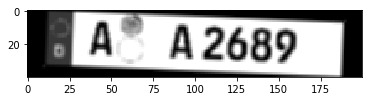

In [1024]:
# Make grey
grey_images = []

for image in images:
    grey_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

print('Shape:', grey_images[0].shape)
plt.imshow(grey_images[0], cmap='gray')

In [1025]:
shapes = set()
for image in grey_images:
    shapes.add(image.shape)
print(shapes)

{(40, 200)}


Shape: (40, 200)


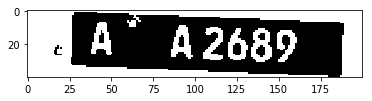

In [1026]:
# Make grey
binary_images = []

for image in grey_images:
    binary_images.append(cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1])

print('Shape:', binary_images[0].shape)
plt.imshow(binary_images[0], cmap='gray')

In [1028]:
# Expand dim
expended_images = []

for image in binary_images:
    expended_images.append(np.expand_dims(image, axis=-1))
    
print('Shape:', expended_images[0].shape)

Shape: (40, 200, 1)


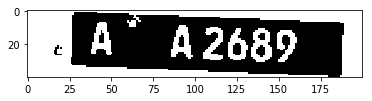

In [1029]:
plt.imshow(expended_images[0].reshape((40, 200)), cmap='gray')

In [32]:
test = expended_images[0].reshape((40, 200))

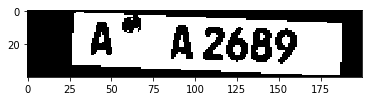

In [33]:
plt.imshow(test > 120, cmap='gray')

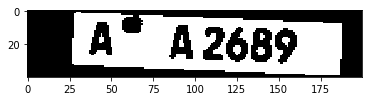

In [34]:
_,thresh = cv2.threshold(expended_images[0],127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

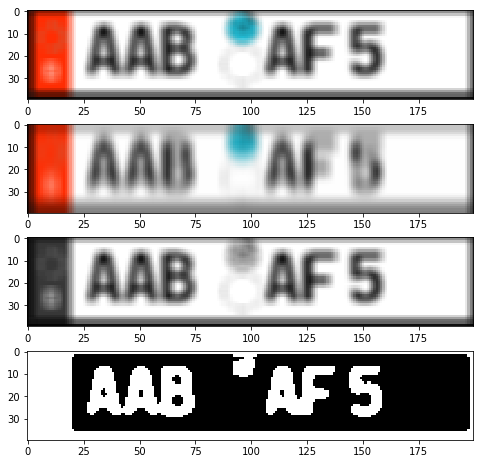

In [979]:
index = 126
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 4
fig.add_subplot(rows, columns, 1)
plt.imshow(images[index], cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(blurred_images[index], cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(grey_images[index], cmap='gray')
fig.add_subplot(rows, columns, 4)
plt.imshow(cv2.threshold(grey_images[index], 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1], cmap='gray')
plt.show()

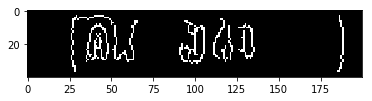

In [499]:
canny = cv2.Canny(grey_images[index], 0, 130, 3)
plt.imshow(canny, cmap='gray')

10


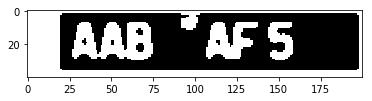

In [990]:
image = images[index]
kernel = np.ones((2, 2), np.uint8)
# image = cv2.GaussianBlur(image, (1, 1), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# image = cv2.dilate(image, kernel, iterations = 3)
# image = cv2.erode(image, kernel, iterations = 3)

contours = cv2.findContours(image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
print(len(contours))

plt.imshow(image, cmap='gray')

In [994]:
image = images[index]
def find_bboxes(image):
    image = cv2.GaussianBlur(image, (1, 9), 0)
#     blurred_image = cv2.blur(image, (5, 9))

    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Add some extra padding around the image
    # gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#     image = cv2.GaussianBlur(image, (9, 11), 10)
    
    # canny
    kernel = np.ones((3, 1), np.uint8)
#     image = cv2.dilate(image, kernel, iterations = 3)
#     image = cv2.erode(image, kernel, iterations = 3)
    
    # find the contours (continuous blobs of pixels) the image
    contours = cv2.findContours(image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0] # if imutils.is_cv2() else contours[1]

    letter_image_regions = []

    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        letter_image_regions.append((x, y, w, h))

    return sorted(letter_image_regions, key=lambda x: x[0])

letter_image_regions = find_bboxes(image)
print(len(letter_image_regions))

11


In [995]:
def discard_nested_bbox(bboxes):
    final_boxes = []
    for box_cur in range(len(bboxes)):
        for box_next in range(len(bboxes)):
            if box_cur == box_next:
                continue
            x_c, y_c, w_c, h_c = bboxes[box_cur]
            x_n, y_n, w_n, h_n = bboxes[box_next]
            if w_n <= 25 and x_c >= x_n and y_c >= y_n and x_c + w_c <= x_n + w_n and y_c + h_c <= y_n + h_n:
                break
            if w_c <= 6 or h_c <= 10:
                break
        else:
            final_boxes.append(bboxes[box_cur])
    return final_boxes
letter_image_regions = discard_nested_bbox(letter_image_regions[:])
print(len(letter_image_regions))

6


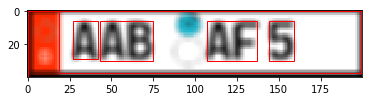

In [996]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

im = images[index]
def draw_bboxes(img, bboxes):
# Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(img)
    for bbox in bboxes:
    # Create a Rectangle patch
        x, y, w, h = bbox
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()
draw_bboxes(image, letter_image_regions[:])

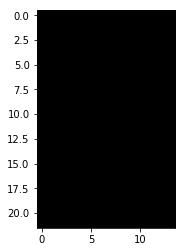

In [930]:
image = images[index]
image = cv2.GaussianBlur(image, (1, 9), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.threshold(image, 190, 255, cv2.THRESH_BINARY_INV)[1]
x, y, w, h = letter_image_regions[4]
plt.imshow(image[y:y+h, x:x+w], cmap='gray')

In [899]:
print(np.mean(image[y:y+h, x:x+w]))

204.0


In [882]:
image[y:y+h, x:x+w]

array([[255, 255, 255, 255, 255],
       [255, 255,   0, 255, 255],
       [255,   0,   0, 255, 255],
       [255,   0,   0, 255, 255],
       [255,   0,   0,   0, 255],
       [255,   0,   0,   0, 255],
       [255,   0,   0,   0, 255],
       [255,   0,   0,   0, 255],
       [255,   0,   0,   0, 255],
       [255, 255, 255, 255, 255]], dtype=uint8)

In [975]:
def find_number(boxes):
    boxes = sorted(boxes, key=lambda x: x[0])
    mean_height = np.median([box[3] for box in boxes])
    mean_width = np.median([box[3] for box in boxes])
#     print( mean_width*1.4, mean_height/1.3)
    only_x = [box[0] for box in boxes if mean_width*1.4 > box[2] and mean_height/1.3 < box[3]]
    dist = []
    for i in range(1, len(only_x)):
        dist.append(only_x[i] - only_x[i-1])
    ind = np.argmax(dist)
    return ind + 1

find_number(letter_image_regions[1:])

1

In [971]:
print(*letter_image_regions[1:], sep='\n')

(39, 14, 12, 19)
(76, 0, 124, 40)
(87, 11, 12, 18)
(105, 10, 12, 18)


In [1084]:
# Labels processing

labels_final = np.array([len(label.split('_')[0]) for label in labels])
labels_rp_train_final = np.array([len(label.split('_')[0]) for label in labels_rp_train])
labels_rp_valid_final = np.array([len(label.split('_')[0]) for label in labels_rp_valid])
labels_sp_valid_final = np.array([len(label.split('_')[0]) for label in labels_sp_valid])

for labels_, name in zip([labels_final, labels_sp_valid_final, labels_rp_train_final, labels_rp_valid_final], ['SP train', 'SP valid', 'RP train', 'RP valid']):
    print(name)
    (unique, counts) = np.unique(labels_, return_counts=True)
    print(*sorted(zip(unique, counts), key=lambda x: -x[1]), sep='\n')
    print('-' * 50)

index_rp_train_less_than_4 = labels_rp_train_final <=4
labels_rp_train_final = labels_rp_train_final[index_rp_train_less_than_4]
images_rp_train = np.array(images_rp_train)[index_rp_train_less_than_4]

SP train
(3, 3017)
(1, 3016)
(2, 2694)
(4, 245)
--------------------------------------------------
SP valid
(1, 359)
(3, 319)
(2, 301)
(4, 31)
--------------------------------------------------
RP train
(2, 315)
(3, 227)
(1, 155)
(4, 1)
(6, 1)
(7, 1)
--------------------------------------------------
RP valid
(2, 6)
(3, 3)
(1, 1)
--------------------------------------------------


In [1016]:
def accuracy_measure(labels, images):
    classification = []
    for label, image in zip(labels, images):
        try:
            bboxes = find_bboxes(image)
            bboxes = discard_nested_bbox(bboxes)
            number = find_number(bboxes[1:])
            classification.append(number == label)
        except Exception as e:
#             print(e)
            classification.append(False)
    return sum(classification)/len(classification)

classification = []
n = 0
n_exception = 0
for label, image in zip(labels_final, images):
    try:
        bboxes = find_bboxes(image)
        bboxes = discard_nested_bbox(bboxes)
        number = find_number(bboxes[1:])
        classification.append(number == label)
    except Exception as e:
        print(e, n)
        classification.append(False)
        n_exception += 1
    n += 1

attempt to get argmax of an empty sequence 378
attempt to get argmax of an empty sequence 569
attempt to get argmax of an empty sequence 842
attempt to get argmax of an empty sequence 1774
attempt to get argmax of an empty sequence 1856
attempt to get argmax of an empty sequence 2023
attempt to get argmax of an empty sequence 3089
attempt to get argmax of an empty sequence 3170
attempt to get argmax of an empty sequence 3446
attempt to get argmax of an empty sequence 3482
attempt to get argmax of an empty sequence 3911
attempt to get argmax of an empty sequence 4316
attempt to get argmax of an empty sequence 4914
attempt to get argmax of an empty sequence 4915
attempt to get argmax of an empty sequence 5064
attempt to get argmax of an empty sequence 5175
attempt to get argmax of an empty sequence 5388
attempt to get argmax of an empty sequence 6459
attempt to get argmax of an empty sequence 6958
attempt to get argmax of an empty sequence 7134
attempt to get argmax of an empty sequence 

In [1013]:
print(sum(classification)/len(classification))
print(n_exception)

0.8296923762817655
22


In [978]:
[i for i, x in enumerate(classification) if not x]

[126,
 131,
 132,
 135,
 142,
 146,
 148,
 150,
 158,
 161,
 162,
 169,
 172,
 176,
 177,
 182,
 192,
 194,
 197,
 203,
 205,
 209,
 210,
 214,
 219,
 220,
 227,
 231,
 236,
 243,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 273,
 274,
 276,
 277,
 285,
 287,
 288,
 291,
 296,
 315,
 317,
 319,
 320,
 342,
 354,
 367,
 378,
 407,
 478,
 487,
 490,
 492,
 496,
 500,
 511,
 514,
 515,
 516,
 517,
 523,
 524,
 525,
 526,
 527,
 529,
 531,
 539,
 553,
 557,
 558,
 561,
 562,
 568,
 569,
 579,
 581,
 583,
 589,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 622,
 624,
 627,
 664,
 666,
 690,
 807,
 824,
 828,
 830,
 831,
 832,
 833,
 836,
 838,
 842,
 846,
 848,
 851,
 853,
 866,
 869,
 879,
 880,
 894,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929

In [1017]:
for images_, labels, name in zip([images_sp_valid, images_rp_train, images_rp_valid], [labels_sp_valid_final, labels_rp_train_final, labels_rp_valid_final], ['SP valid', 'RP train', 'RP valid']):
        print(f'{name}: {accuracy_measure(labels, images_)}')

SP valid: 0.8326732673267326
RP train: 0.5371428571428571
RP valid: 0.6


In [ ]:
image = images[index]
def find_bboxes(image):
    image = cv2.GaussianBlur(image, (1, 9), 0)
#     blurred_image = cv2.blur(image, (5, 9))

    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Add some extra padding around the image
    # gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#     image = cv2.GaussianBlur(image, (9, 11), 10)
    
    # canny
    kernel = np.ones((3, 1), np.uint8)
#     image = cv2.dilate(image, kernel, iterations = 3)
#     image = cv2.erode(image, kernel, iterations = 3)
    
    # find the contours (continuous blobs of pixels) the image
    contours = cv2.findContours(image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0] # if imutils.is_cv2() else contours[1]

    letter_image_regions = []

    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        letter_image_regions.append((x, y, w, h))

    return sorted(letter_image_regions, key=lambda x: x[0])

letter_image_regions = find_bboxes(image)
print(len(letter_image_regions))

def discard_nested_bbox(bboxes):
    final_boxes = []
    for box_cur in range(len(bboxes)):
        for box_next in range(len(bboxes)):
            if box_cur == box_next:
                continue
            x_c, y_c, w_c, h_c = bboxes[box_cur]
            x_n, y_n, w_n, h_n = bboxes[box_next]
            if w_n <= 25 and x_c >= x_n and y_c >= y_n and x_c + w_c <= x_n + w_n and y_c + h_c <= y_n + h_n:
                break
            if w_c <= 6 or h_c <= 10:
                break
        else:
            final_boxes.append(bboxes[box_cur])
    return final_boxes
letter_image_regions = discard_nested_bbox(letter_image_regions[:])
print(len(letter_image_regions))

def find_number(boxes):
    boxes = sorted(boxes, key=lambda x: x[0])
    mean_height = np.mean([box[3] for box in boxes])
    mean_width = np.mean([box[3] for box in boxes])
    only_x = [box[0] for box in boxes if mean_height/1.3 < box[3] and mean_width*1.4 > box[2]]
    dist = []
    for i in range(1, len(only_x)):
        dist.append(only_x[i] - only_x[i-1])
    ind = np.argmax(dist)
    return ind + 1

find_number(letter_image_regions[1:])

## Model

In [784]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [1288]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(40, 75, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [1279]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 38, 73, 16)        160       
_________________________________________________________________
activation_24 (Activation)   (None, 38, 73, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 19, 36, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 17, 34, 32)        4640      
_________________________________________________________________
activation_25 (Activation)   (None, 17, 34, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 17, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 15, 64)         18496     
__________

In [1283]:
def transform_images(images_):
    images_new = []
    for image in images_:
        image_new = cv2.resize(image, (200, 40))
        
        image_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2GRAY)
#         image_new = cv2.GaussianBlur(image_new, (3, 3), 10)
        
        image_new = cv2.threshold(image_new, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# #         image_new = cv2.adaptiveThreshold(image_new,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,17,25)

        contours = cv2.findContours(image_new, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
        for bbox in contours:
            (x, y, w, h) = cv2.boundingRect(bbox)
            if w <= 6 or h <= 15:
                image_new[y:y+h, x:x+w] = 0
                
#         # canny
        kernel = np.ones((3, 2), np.uint8)
        image_new = cv2.dilate(image_new, kernel, iterations = 1)
#         image_new = cv2.erode(image_new, kernel, iterations = 3)

        image_new = image_new[:,15:90]
    
        image_new = np.expand_dims(image_new, axis=-1)
        images_new.append(list(image_new))
    return np.array(images_new)

In [1270]:
# input_to_model = np.concatenate((transform_images(images), transform_images(images_rp_train))) / 255
# input_to_model.shape

In [1289]:
input_to_model = np.concatenate((transform_images(images), transform_images(images_rp_train))) / 255
labels_to_model = np.concatenate((labels_final, labels_rp_train_final))

# input_to_model = transform_images(images_rp_train) / 255
# labels_to_model = labels_rp_train_final

indexes = np.arange(input_to_model.shape[0])
np.random.shuffle(indexes)

input_to_model = input_to_model[indexes]
labels_to_model = labels_to_model[indexes] - 1

model.fit(input_to_model, labels_to_model, epochs=30)

Epoch 1/30
9670/9670 [==============================] - 24s 2ms/step - loss: 0.4136 - acc: 0.8804
Epoch 2/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.2650 - acc: 0.9185
Epoch 3/30
9670/9670 [==============================] - 22s 2ms/step - loss: 0.2001 - acc: 0.9303
Epoch 4/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.1546 - acc: 0.9404
Epoch 5/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.1284 - acc: 0.9523
Epoch 6/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.1022 - acc: 0.9640
Epoch 7/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.0852 - acc: 0.9705
Epoch 8/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.0668 - acc: 0.9768
Epoch 9/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.0560 - acc: 0.9800
Epoch 10/30
9670/9670 [==============================] - 23s 2ms/step - loss: 0.0472 - acc: 0.9825
Epoch 11/30
9670/96

In [1290]:
for images_, labels_, name in zip([images, images_sp_valid, images_rp_train, images_rp_valid], [labels_final, labels_sp_valid_final, labels_rp_train_final, labels_rp_valid_final], ['SP Train', 'SP valid', 'RP train', 'RP valid']):
    if name == 'SP Train' or name == 'SP valid':
        continue
    print(f'{name}: {model.evaluate(transform_images(images_)/255, labels_ - 1)[1]}')

698/698 [==============================] - 1s 1ms/step
RP train: 0.9885386819484241
10/10 [==============================] - 0s 1ms/step
RP valid: 1.0


In [1274]:
print(*list(zip(np.argmax(model.predict(transform_images(images_rp_valid)/255), axis=1) + 1,labels_rp_valid_final)), sep='\n')

(2, 2)
(2, 3)
(2, 3)
(1, 1)
(2, 2)
(2, 2)
(2, 2)
(3, 2)
(2, 2)
(3, 3)


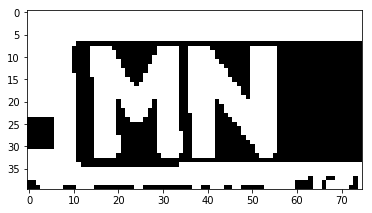

In [1287]:
img = transform_images(images_rp_valid[5:6])[0].reshape((40, 75))
plt.imshow(img, cmap='gray')

In [1244]:
img.shape

(40, 75, 1)

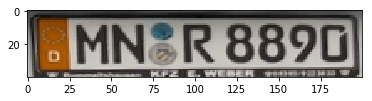

In [1228]:
plt.imshow(images_rp_valid[5], cmap='gray')